# Importing libraries

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Getting Data

In [136]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#flatten the data
x_train=x_train.reshape(60000,784)

## Getting PCA Value

In [137]:
'''
x_train: data on which PCA is going to apply
sample: number of principal component you want
'''
def get_pca(x_train,sample=2):
    standardized_data = StandardScaler().fit_transform(x_train)
    data = standardized_data
    covariance_matrix = np.matmul(data.T, data)
    values, vectors = eigh(covariance_matrix)
    values = values[-sample:]
    vectors = vectors[:,-sample:]
    vectors = vectors.T
    reduced_data = np.matmul(vectors, data.T)
    return reduced_data

In [138]:
# Apply the function to get the PCA reduce form data
reduced_data = get_pca(x_train,10)

In [142]:
#Visualization of reduce data
merge_data = np.vstack((reduced_data, y_train))
merge_data = merge_data.T
label = ["1","2","3","4","5","6","7","8","9","10","label"]
df_reduce = pd.DataFrame(data=merge_data, columns=label)

In [143]:
df_reduce

,1,2,3,4,5,6,7,8,9,10,label
0,-2.324207,-1.052314,-1.393473,-0.336139,-0.951616,-0.985347,8.051329,-0.067560,-4.814790,-0.922159,5.0
1,1.196196,-0.198393,-3.135456,0.272279,5.144664,0.834795,1.668321,3.447910,-7.754403,8.708977,0.0
2,0.151141,2.170118,-3.992473,-18.691539,-2.291390,4.092456,-1.725066,6.184114,9.431338,2.328389,4.0
3,2.617184,-0.624820,4.600462,-1.561415,-3.461544,5.627325,0.461041,-3.690851,-3.746318,-6.582173,1.0
4,0.699051,0.012948,3.206010,0.580065,0.612565,-1.608842,-1.459654,6.277947,3.133297,-5.183251,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.040519,-1.569236,3.662751,0.222213,-2.901570,-0.645579,4.688222,-0.375261,-5.119129,-2.039339,8.0
59996,-1.088071,-7.245211,-0.924782,-3.967956,-1.240176,-1.009540,8.397312,-3.507305,-6.498440,0.607841,3.0
59997,-4.493487,2.734803,2.475236,-1.697904,2.879084,-1.361753,7.503987,3.806199,-3.230564,-3.777212,5.0
59998,0.507499,2.749771,-3.799631,-3.642969,5.067463,-0.925236,-7.150954,-0.006951,-4.948125,1.722369,6.0


<Figure size 432x288 with 0 Axes>

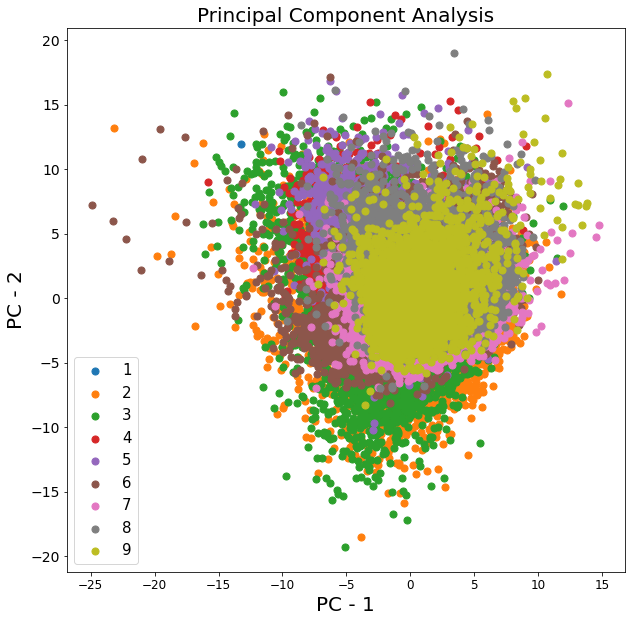

In [151]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC - 1',fontsize=20)
plt.ylabel('PC - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [1,2,3,4,5,6,7,8,9]
colors = ['r', 'g','b','y','v','o','bl','c','tab:olive']
for target, color in zip(targets,colors):
    indicesToKeep = df_reduce['label'] == target
    plt.scatter(df_reduce.loc[indicesToKeep, '1']
               , df_reduce.loc[indicesToKeep, '2'], s = 50)

plt.legend(targets,prop={'size': 15})

## Training data on KNN

In [152]:
X = reduced_data.T
y = y_train

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [169]:
predict = neigh.predict(X_test)

print(f"Testing Accuracy: {round(accuracy_score(y_test, predict)*100)}%")

Testing Accuracy: 91.0%
